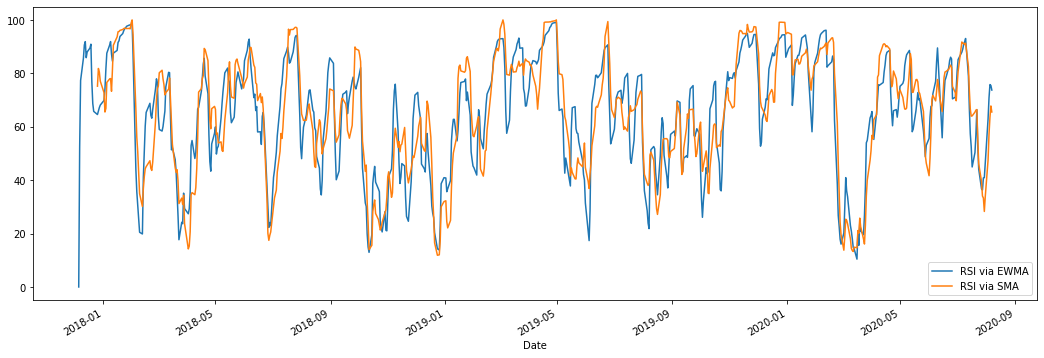

In [2]:

import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader.data as web


# Window length for moving average
mean_lenght = 3
window_length = 14

# Dates
start = '2017-12-01'
end = datetime.datetime.now()

# Get data
stock = 'MSFT'
data = web.DataReader(stock, 'yahoo', start, end)

# Get just the adjusted close
close = data['Adj Close']
volume = data['Volume']

# Get the difference in price from previous step
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy().rolling(window=mean_lenght).mean(), delta.copy().rolling(window=mean_lenght).mean()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the EWMA
roll_up1 = up.ewm(span=window_length).mean()
roll_down1 = down.abs().ewm(span=window_length).mean()

# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

# Calculate the SMA
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))


# Compare graphically
plt.figure(figsize=(18, 6))
RSI1.plot()
RSI2.plot()
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()


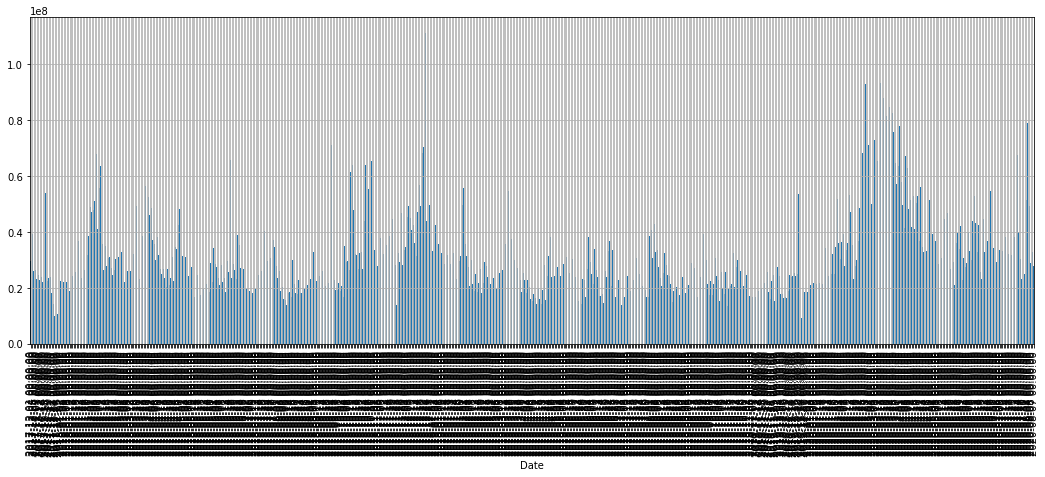

In [3]:
volume.plot.bar(figsize=(18, 6))
plt.grid()
plt.show()

In [4]:
buy_sell_signal = RSI1.rolling(window=2).mean()
low_threshold = 20
high_threshold = 80
buy_sell_signal[buy_sell_signal > 60] = 100
buy_sell_signal[buy_sell_signal < 30] = 0
#buy_sell_signal = np.where(buy_sell_signal != 100, 50)


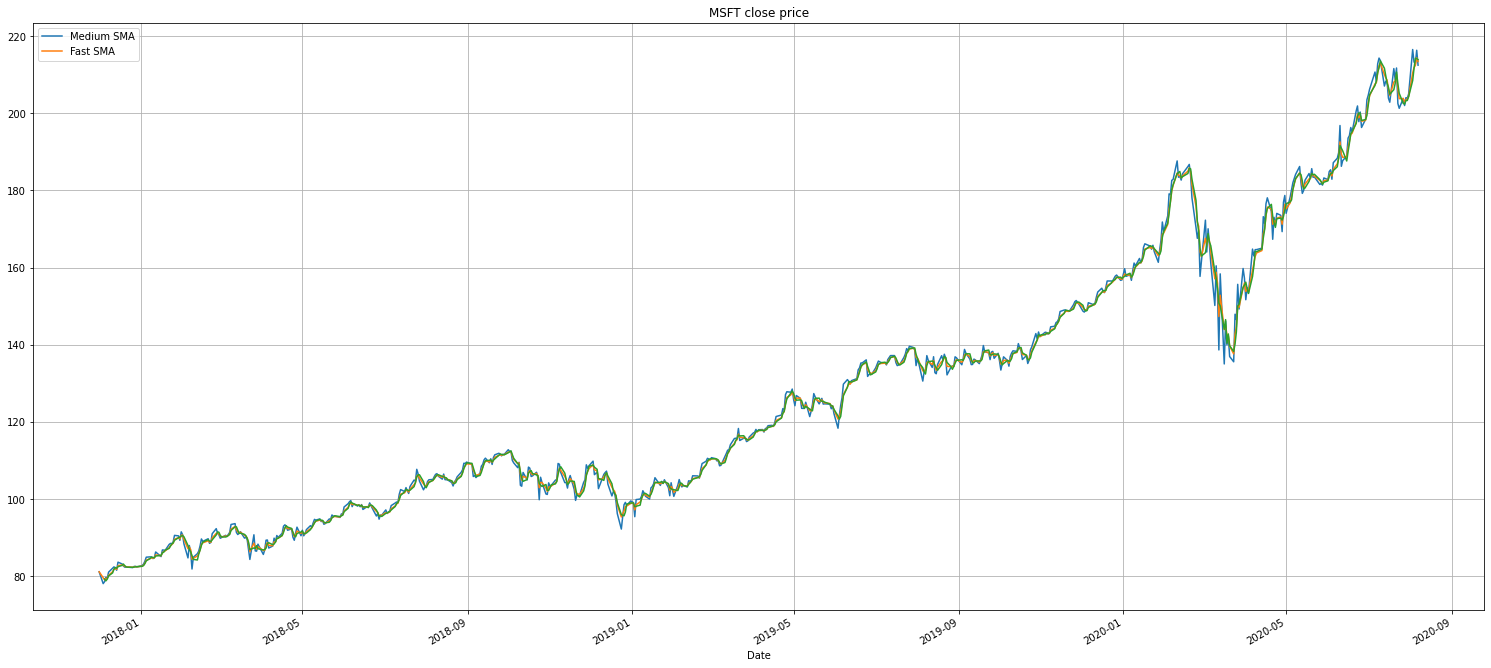

In [5]:
fast_window_length = 3
medium_window_length = 5
slow_window_length = 8

fast_ema = close.ewm(span=fast_window_length, adjust=False).mean()
#medium_ema = close.ewm(span=medium_window_length, adjust=False).mean()
slow_ema = close.ewm(span=slow_window_length, adjust=False).mean()

medium_ema = close.rolling(window=fast_window_length).mean()
#medium_ema = close.rolling(window=medium_window_length).mean()
#slow_ema = close.rolling(window=slow_window_length).mean()

import datetime
import pandas_datareader.data as web


# Window length for moving average
window_length = 14

# Dates
close.plot(title=stock + " close price", figsize=(26,12))
fast_ema.plot()
medium_ema.plot()
#slow_ema.plot()
plt.legend([
    #'Slow SMA', 
    'Medium SMA', 
    'Fast SMA'
    ])
plt.grid()
plt.show()

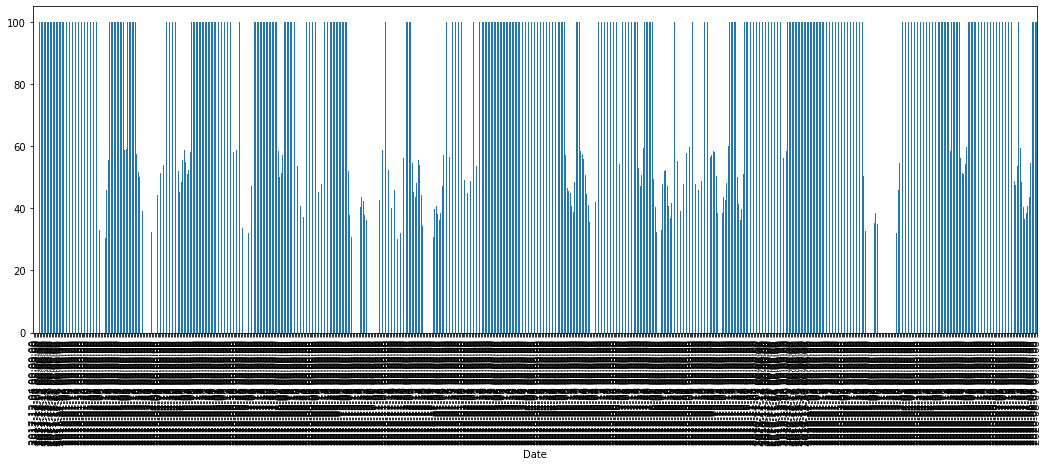

In [6]:
buy_sell_signal.plot.bar(figsize=(18, 6))
plt.show()


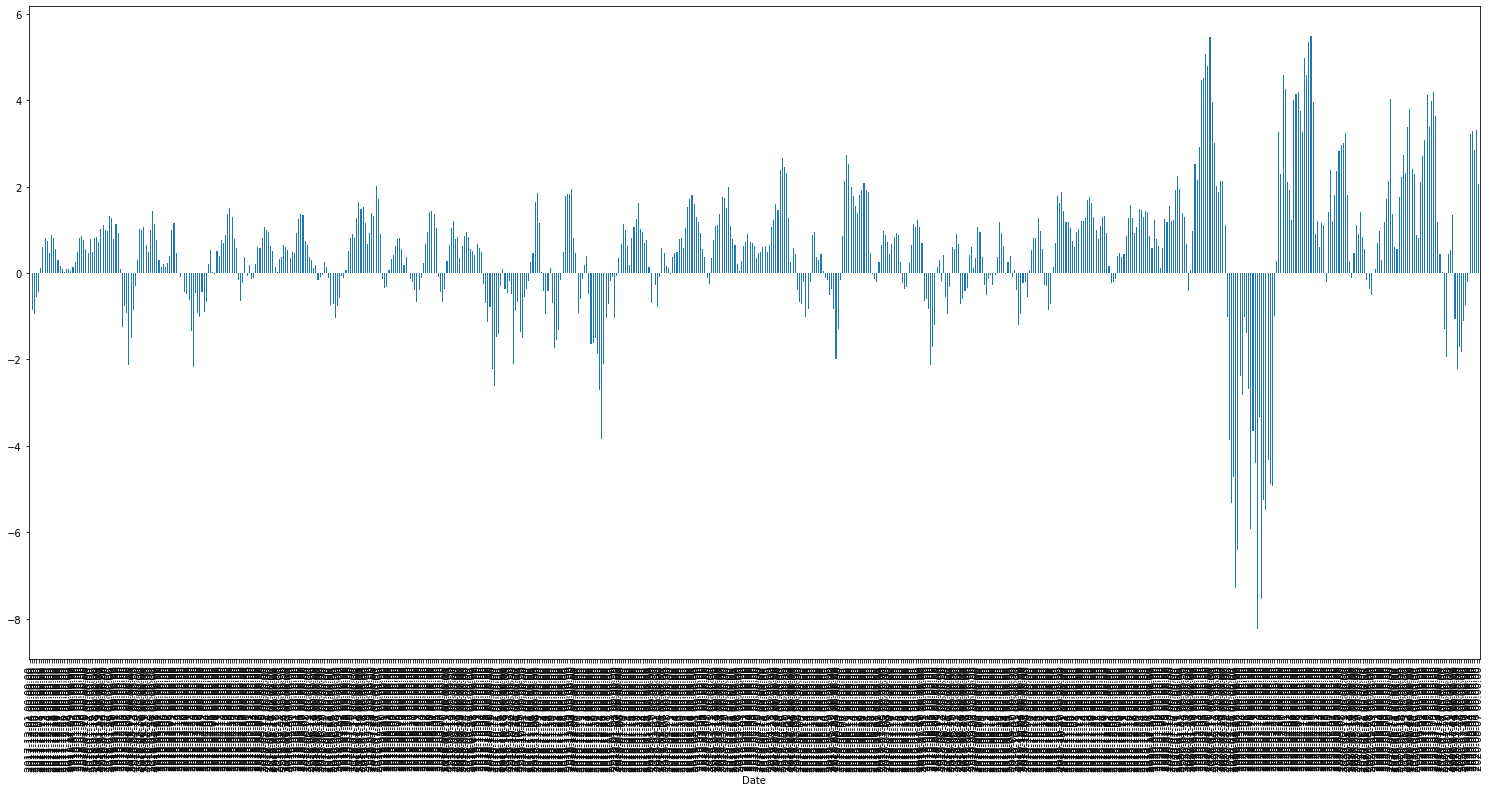

In [7]:
macd = fast_ema - slow_ema
macd.plot.bar(figsize=(26,12))
plt.show()

Entering oversold zone at 3
Exiting oversold zone at 4
Exiting overbought zone at 43
Entering oversold zone at 45
Exiting oversold zone at 48
Entering overbought zone at 51
Exiting overbought zone at 61
Entering overbought zone at 63
Exiting overbought zone at 69
Entering oversold zone at 75
Exiting oversold zone at 79
Entering oversold zone at 80
Exiting oversold zone at 82
Entering overbought zone at 88
Exiting overbought zone at 97
Entering overbought zone at 106
Exiting overbought zone at 134
Entering overbought zone at 137
Exiting overbought zone at 139
Entering oversold zone at 141
Exiting oversold zone at 144
Entering overbought zone at 148
Exiting overbought zone at 164
Entering overbought zone at 168
Exiting overbought zone at 176
Entering overbought zone at 183
Exiting overbought zone at 190
Entering overbought zone at 195
Exiting overbought zone at 211
Entering oversold zone at 214
Exiting oversold zone at 219
Entering oversold zone at 224
Exiting oversold zone at 231
Enteri

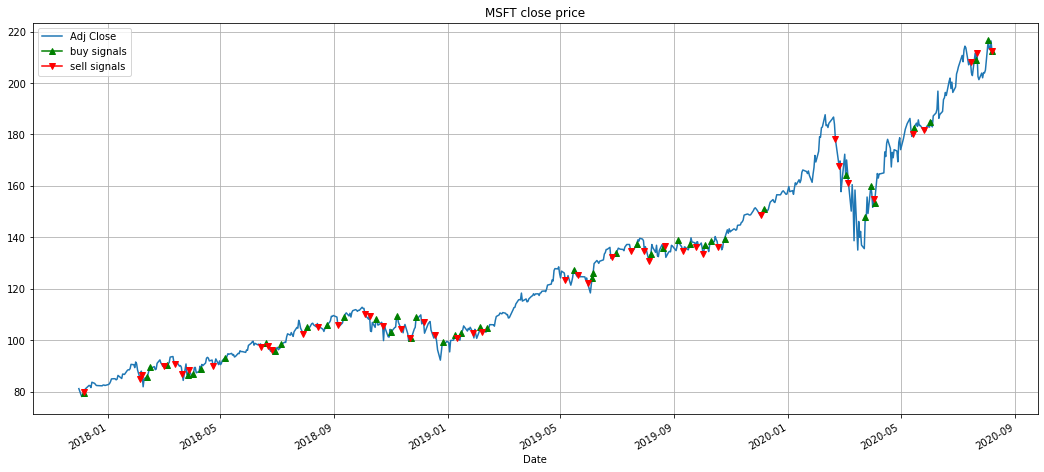

In [8]:

def apply_rsi(close,buy_sell_signal):

    prev_rsi = None
    curr_rsi = None

    data['buy signals'] = close.copy()
    data['sell signals'] = close.copy()

    buy_sig = data['buy signals']
    sell_sig = data['sell signals']
    
    for i in range(0, len(buy_sell_signal)):

        curr_rsi = buy_sell_signal[i]
        if i == 0:
            buy_sig[i] = np.nan
            sell_sig[i] = np.nan
            prev_rsi = curr_rsi
            continue

        # Entering oversold zone
        if prev_rsi != 0 and curr_rsi == 0:
            print("Entering oversold zone at " + str(i))
            sell_sig[i] = close[i]
            buy_sig[i] = np.nan

        # Exiting oversold zone
        elif prev_rsi == 0 and curr_rsi != 0:
            print("Exiting oversold zone at " + str(i))
            buy_sig[i] = close[i]
            sell_sig[i] = np.nan

        # Entering overbought zone
        elif prev_rsi != 100 and curr_rsi == 100:
            print("Entering overbought zone at " + str(i))
            buy_sig[i] = close[i]
            sell_sig[i] = np.nan

        # Exiting overbought zone
        elif prev_rsi == 100 and curr_rsi != 100:
            print("Exiting overbought zone at " + str(i))
            sell_sig[i] = close[i]
            buy_sig[i] = np.nan

        # None of the above
        else:
            buy_sig[i] = np.nan
            sell_sig[i] = np.nan

        prev_rsi = curr_rsi

    return buy_sig, sell_sig

buy, sell = apply_rsi(close,buy_sell_signal)

close.plot(title=stock + " close price", figsize=(18,8))
buy.plot(marker = '^', color='green')
sell.plot(marker = 'v', color='red')
plt.legend()
plt.grid()
plt.show()
